--2025-01-01 09:16:40--  https://github.com/Prashant-AV/Qualcomm-DL-Hackathon/blob/master/train/images%20part-1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘images_part1.zip’

images_part1.zip        [ <=>                ] 221.12K  --.-KB/s    in 0.006s  

2025-01-01 09:16:40 (34.7 MB/s) - ‘images_part1.zip’ saved [226426]



--2025-01-01 09:05:26--  https://github.com/Prashant-AV/Qualcomm-DL-Hackathon/blob/master/train/images%20part-2.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘images part-2.zip’

images part-2.zip       [ <=>                ] 221.09K  --.-KB/s    in 0.01s   

2025-01-01 09:05:27 (21.4 MB/s) - ‘images part-2.zip’ saved [226401]



--2025-01-01 09:05:44--  https://github.com/Prashant-AV/Qualcomm-DL-Hackathon/blob/master/train/train.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train.csv’

train.csv               [ <=>                ] 253.20K  --.-KB/s    in 0.008s  

2025-01-01 09:05:44 (32.5 MB/s) - ‘train.csv’ saved [259279]



In [2]:
!git clone https://github.com/Prashant-AV/Qualcomm-DL-Hackathon/

Cloning into 'Qualcomm-DL-Hackathon'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 30.68 MiB | 27.70 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [13]:
f = open("./Qualcomm-DL-Hackathon/train/train.csv","r")

In [15]:
f.read()
f.close()

In [20]:
list(os.walk("./Qualcomm-DL-Hackathon/train/images_part-1"))

[('./Qualcomm-DL-Hackathon/train/images_part-1',
  [],
  ['0.jpg',
   '1.jpg',
   '10.jpg',
   '100.jpg',
   '1000.jpg',
   '1001.jpg',
   '1002.jpg',
   '1003.jpg',
   '1004.jpg',
   '1005.jpg',
   '1006.jpg',
   '1007.jpg',
   '1008.jpg',
   '1009.jpg',
   '101.jpg',
   '1010.jpg',
   '1011.jpg',
   '1012.jpg',
   '1013.jpg',
   '1014.jpg',
   '1015.jpg',
   '1016.jpg',
   '1017.jpg',
   '1018.jpg',
   '1019.jpg',
   '102.jpg',
   '1020.jpg',
   '1021.jpg',
   '1022.jpg',
   '1023.jpg',
   '1024.jpg',
   '1025.jpg',
   '1026.jpg',
   '1027.jpg',
   '1028.jpg',
   '1029.jpg',
   '103.jpg',
   '1030.jpg',
   '1031.jpg',
   '1032.jpg',
   '1033.jpg',
   '1034.jpg',
   '1035.jpg',
   '1036.jpg',
   '1037.jpg',
   '1038.jpg',
   '1039.jpg',
   '104.jpg',
   '1040.jpg',
   '1041.jpg',
   '1042.jpg',
   '1043.jpg',
   '1044.jpg',
   '1045.jpg',
   '1046.jpg',
   '1047.jpg',
   '1048.jpg',
   '1049.jpg',
   '105.jpg',
   '1050.jpg',
   '1051.jpg',
   '1052.jpg',
   '1053.jpg',
   '1054.jpg',

In [93]:
import pandas as pd
import os


## name of folders are changed


train_csv = r"./Qualcomm-DL-Hackathon/train/train.csv" #"/content/Qualcomm-DL-Hackathon/train/train.csv"
df = pd.read_csv(train_csv)
df.head()

im_pt_1 =  r"./Qualcomm-DL-Hackathon/train/images_part-1" #"/content/Qualcomm-DL-Hackathon/train/images_part-1"
base,_,images = next(os.walk(im_pt_1))

images_path = list(map(lambda im : os.path.join(base,im),images))


im_pt_2 = r"./Qualcomm-DL-Hackathon/train/images_part-2" #"/content/Qualcomm-DL-Hackathon/train/images_part-2"
base,_,images2 = next(os.walk(im_pt_2))

images2_path = list(map(lambda im : os.path.join(base,im),images2))

images.extend(images2)
images_path.extend(images2_path)

image_path_lookup = dict(zip(images,images_path))

paths = []
for r in df.iterrows():
  im = r[1].iloc[0]
  pth = image_path_lookup.get(im,None)
  #print(im,pth)
  if not pth:
    print(im)
  paths.append(pth)

df["paths"] = paths

#len(image_path_lookup)
df.shape

(1646, 3)

In [28]:
!pip install torchvision

ERROR: Could not install packages due to an OSError: Could not find a suitable TLS CA certificate bundle, invalid path: C:\ProgramData\Netskope\STAgent\download\nscacert_combined.pem



In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open(r"./Qualcomm-DL-Hackathon/train/images_part-2/1503.jpg")
image.size

(224, 224)

In [26]:
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):

        self.image_paths = dataframe["paths"].to_list()
        self.labels = dataframe["emergency_or_not"].to_list()
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label



In [101]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
# transform = transforms.Compose([transforms.Resize(255),
#                                  transforms.CenterCrop(224),
#                                  transforms.ToTensor()])

transform = transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = CustomImageDataset(df, transform=transform)
batch_size = 30
validation_split = 0.3
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)


In [99]:
len(val_indices)


493

torch.Size([30, 3, 224, 224])


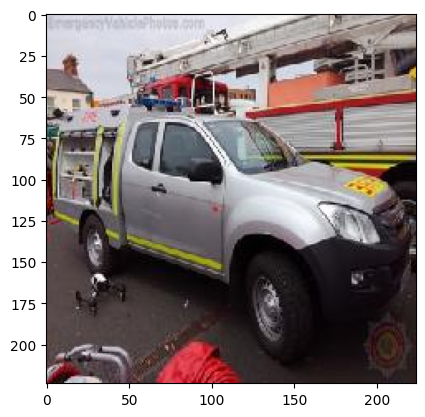

In [100]:
from matplotlib.pyplot import imshow
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(train_loader))
print(images.size())
imshow(images[0])

In [102]:

import torch.nn as nn
import torch.nn.functional as F
import torch

hidden_layer1 = 60
hidden_layer2 = 30
hidden_layer3 = 120
hidden_layer4 = 84

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, hidden_layer1, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_layer1, hidden_layer2, 5)
        self.fc1 = nn.Linear(hidden_layer2 * 53 * 53, hidden_layer3)
        self.fc2 = nn.Linear(hidden_layer3, hidden_layer4)
        self.fc3 = nn.Softmax(1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [105]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i %  == 1:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [86]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {len(val_indices)} test images: {100 * correct // total} %')



4.431082725524902
4.431094169616699
4.431077003479004
4.431050777435303
4.431097030639648
4.431061744689941
4.4311065673828125
4.43105411529541
4.431077480316162
4.431108474731445
4.431041717529297
4.431069374084473
4.431109428405762
4.431066036224365
4.4311113357543945
4.431080341339111
4.431121826171875
4.431005477905273
4.431107997894287
4.431048393249512
4.431055545806885
4.431059837341309
4.431075096130371
4.431094169616699
4.431056976318359
4.4310784339904785
4.431098937988281
4.431082725524902
4.431000709533691
4.431083679199219
4.43110466003418
4.431078910827637
4.431091785430908
4.431039333343506
4.431052207946777
4.431028842926025
4.431018352508545
4.431069374084473
4.430976867675781
4.4310407638549805
4.431078910827637
4.431078910827637
4.431105136871338
4.4310503005981445
4.431103706359863
4.431095123291016
4.431000709533691
4.43106746673584
4.431023120880127
4.430992603302002
4.431016445159912
4.431067943572998
4.431004524230957
4.430985927581787
4.431027412414551
4.431038

0